#### Getting factual data/info specific to our question from WolframAlpha

One especially useful API for Data Science is the Wolfram Alpha API. 

Wolfram Alpha is a "knowlede engine", where, like a search engine, you can ask specific queries about a topic ("What is the unemployment rate in Illinois in 2013"). However, unlike a search engine, the answers are returned as factual information in a simple structured format (8.4%).
 
First let us import the two libraries we need to access an API and parse the information:

Remember, the requests library allows us to connect to the API and pass along the variables we are requesting.

The lxml.etree library allows us to parse the XML returned by an API

In [1]:
import requests
import lxml.etree as ET


#### Querying Financial Information

Next, we can create a search query about a topic of interest that most likely has a factual answer.

If you are interested in finance, you can ask for the closing price of the New York Stock Echange (NYSE) on a specific day.

This is what the request would look like if you used the web interface: https://www.wolframalpha.com/input/?i=Closing+price+of+NYSE+on+May+6th+2014

Here is a list of all kinds of topics you ask Wolfram Alpha: https://www.wolframalpha.com/examples/

In [2]:
#make a query variable that holds our specific request
query="Closing price of NYSE on May 6th 2014"

#submit the request and write our query at the end of the request
content= requests.get("http://api.wolframalpha.com/v2/query?appid=JRUT3Q-J7X5RLLY5U&input="+query)    

#Get the XML response returned by the API
#.text part gets the just the plaintext information from the XML request
#the . utf-8 part encodes the text to handle a broader range of characters
content_string = content.text.encode("utf-8")

#note that sometimes the request timesout

In [3]:
#pass on the XML to our XML parser
doc = ET.fromstring(str(content_string))

#Show the content
print ET.tostring(doc, pretty_print=True)
#You should see an XML tree returned. Within this XML tree is our answer
#Our expected result is 10630. Do you see that number in the tree

#if you look at the printed XML returned by the request (above), you can see that our result is within a tag that has the title "Result"
#Within the "Result" tag is another tag called "subpod" that holds out result, and our actual result within the tag called "plaintext"
#go through the tree saying you want the information in the <plaintext> tags which is in the <subpod > tag, which is in the <pos title="Result"> tag

#We ignore the queryresult tag at the top because it is the root tag, and everything is under it

answer = doc.find('pod[@title="Result"]/subpod/plaintext')

#print out the the data that was retrieved
print answer.text

<queryresult success="true" error="false" numpods="2" datatypes="Financial" timedout="Data,PowerTower,Numeric,List,Factorial" timedoutpods="" timing="4.838" parsetiming="0.674" parsetimedout="false" recalculate="http://www4b.wolframalpha.com/api/v2/recalc.jsp?id=MSPa24351h6b7a451ic93e6d00005b06i4ecc70f5bd3152121174736300209" id="MSPa24361h6b7a451ic93e6d0000494i7ia25132g1ba" host="http://www4b.wolframalpha.com" server="23" related="http://www4b.wolframalpha.com/api/v2/relatedQueries.jsp?id=MSPa24371h6b7a451ic93e6d00005h702ibiee0hdb50152121174736300209" version="2.6">
 <pod title="Input interpretation" scanner="Identity" id="Input" position="100" error="false" numsubpods="1">
  <subpod title="">
   <img src="http://www4b.wolframalpha.com/Calculate/MSP/MSP24381h6b7a451ic93e6d00002c695fdb6bdfed1b?MSPStoreType=image/gif&amp;s=23" alt="NYSE Composite Index | closing price | Tuesday, May 6, 2014" title="NYSE Composite Index | closing price | Tuesday, May 6, 2014" width="464" height="32"/>
   

#### Automatic collection of data

Let's say that you want the NSYE closing price, not just for one day, but all the weekdays.

If you know the days you want, you can construct a "for loop" to automate data collection and retreive results for each day

Here, we will collect the data for the closing price of the New York and the average temperature on that day

#### Getting a list of all of the weekdays in 2015

Don't worry about the specifics of this code.

It allows us to provide a date range and the days of the week we want, and then get a list of those days in "Month Day, Year format

In [4]:
from dateutil.rrule import DAILY, rrule, MO, TU, WE, TH, FR
from dateutil.parser import parse
from time import strftime
datelist =  rrule(DAILY, dtstart=parse("2015-01-01"), until=parse("2015-12-31"), byweekday=(MO,TU,WE,TH,FR))
dates = [date.strftime("%b %d, %Y") for date in datelist]
print dates

['Jan 01, 2015', 'Jan 02, 2015', 'Jan 05, 2015', 'Jan 06, 2015', 'Jan 07, 2015', 'Jan 08, 2015', 'Jan 09, 2015', 'Jan 12, 2015', 'Jan 13, 2015', 'Jan 14, 2015', 'Jan 15, 2015', 'Jan 16, 2015', 'Jan 19, 2015', 'Jan 20, 2015', 'Jan 21, 2015', 'Jan 22, 2015', 'Jan 23, 2015', 'Jan 26, 2015', 'Jan 27, 2015', 'Jan 28, 2015', 'Jan 29, 2015', 'Jan 30, 2015', 'Feb 02, 2015', 'Feb 03, 2015', 'Feb 04, 2015', 'Feb 05, 2015', 'Feb 06, 2015', 'Feb 09, 2015', 'Feb 10, 2015', 'Feb 11, 2015', 'Feb 12, 2015', 'Feb 13, 2015', 'Feb 16, 2015', 'Feb 17, 2015', 'Feb 18, 2015', 'Feb 19, 2015', 'Feb 20, 2015', 'Feb 23, 2015', 'Feb 24, 2015', 'Feb 25, 2015', 'Feb 26, 2015', 'Feb 27, 2015', 'Mar 02, 2015', 'Mar 03, 2015', 'Mar 04, 2015', 'Mar 05, 2015', 'Mar 06, 2015', 'Mar 09, 2015', 'Mar 10, 2015', 'Mar 11, 2015', 'Mar 12, 2015', 'Mar 13, 2015', 'Mar 16, 2015', 'Mar 17, 2015', 'Mar 18, 2015', 'Mar 19, 2015', 'Mar 20, 2015', 'Mar 23, 2015', 'Mar 24, 2015', 'Mar 25, 2015', 'Mar 26, 2015', 'Mar 27, 2015', 'Mar 30

#### A function to retrieve an answer from the Wolfram Alpha given a specific query

Because we are going to be querying the Wolfram Alpha API for each date, we can simplify the code by turning the request code into a function that we can call in our for loop

In [5]:
#we'll need the time library to tell our script to wait in case something goes wrong
import time

#set up a funciton called "ask_wolfram" that take a string query as an input
def ask_wolfram(query):
    
    #We want to create a variable called "success" that changes if we get a result from the API
    success = False
    
    #Keep running the script until success is True
    while success == False:
        
        #Send the API request with our string and save the result as a variable called content
        content= requests.get("http://api.wolframalpha.com/v2/query?input="+query+"&appid=JRUT3Q-J7X5RLLY5U")    
        
        #get the XML content returned from the API and encode it in utf-8, which can handle special characters better
        content_string = content.text.encode('utf-8')
        
        #pass the XML to our XML parser
        doc = ET.fromstring(str(content_string))
        
        #find our results in the XML, which are 
        #save those results to the answer variable
        answer = doc.find('./pod[@title="Result"]/subpod/plaintext')
        
        #If we got nothing from the API, then the answer variable is a None type variable
        
        #If the answer is not None, and we get something, change success to True
        if answer!= None:  success = True
        #otherwise, we should wait for half a second before trying the request again
        else: time.sleep(.5)
    #Once we get out of the above loop, let's break out of the function by returning the answer, making sure it is encoded correctly
    return answer.text.encode('utf-8')


#### The for loop that collects the data we want for all dates

In [6]:
import lxml.etree as ET
import requests
import pandas as pd
from collections import defaultdict



#Make an empty list to hold all of the data we collect from Wolfram Alpha. This list will hold lists that contain the Date, Closing Price, and Temperature for that day.
alldata=[]
#We will only collect the first ten dates to show the process. Collecing the full year would take a much longer time, but you would just take out the [0:10] part
for date in dates[0:3]:
   
    #write the query to get the closing price of the NSYE on a specific day
    query="Closing price of NYSE on " + date
    
    #Get the closing price from Wolfram Alpha
    closing_amt = ask_wolfram(query)
    
    #Make sure that the returned result is a number
    closing_amt=float(closing_amt)
    
    #write the query to get the average temperature in New York on that day    
    query="Average temperature in New York on " + date
    
    #get the temperature value from Wolfram Alpha
    temperature_amt = ask_wolfram(query)
    
    #Make sure the temperature is treated as a number, and doesn't have the degree symbol (splitting "90 oF at the space and getting the first element does this)
    temperature_amt =float(temperature_amt.split(" ")[0])
    
    
    #stock_df = stock_df.append(day_data,ignore_index=True)
    print date
    alldata.append([date,closing_amt,temperature_amt])

#Make a pandas DataFrame out of the data we collected    
stock_df = pd.DataFrame(alldata,columns=["Date", "ClosingPrice", "Temperature" ])

Jan 01, 2015
Jan 02, 2015
Jan 05, 2015


#### Saving / Loading the results to/from a csv

We can save the results we collected as a csv file. We can then load them in again and put into a dataframe

In [7]:
# Don't save the results you have. A csv file with the full information is already saved in the folder
#If you wanted to save them, you would use the following code
#stock_df.to_csv("StockExchangeWeather.csv",sep=",")

#This line reads in the saved csv as a pandas DataFrame named stock_df
stock_df = pd.read_csv("StockExchangeWeather.csv",sep=",")

#### Visualizing trends


We can visualize the data to see if there are any immediately noticable trends of the closing price changing when the weather is hotter or colder. 

When you run the code, do you see any relationship between the temperature in New York and the closing price of the New York Stock Exchange? 

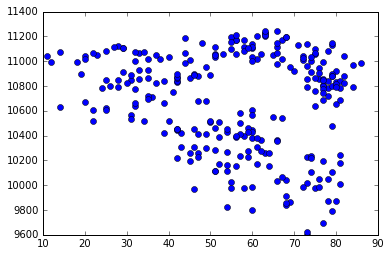

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


#plot a scatterplot of the data
#the x-axis (bottom of the plot) is the hypothesized predictor variable (Temperature)
#The y-axis (left of the plot) is the outcome variable of interest (Closing Price)
# The "o" indicates that we want data represented as circles, not X's or lines
plt.plot( stock_df["Temperature"],stock_df['ClosingPrice'], "o")

#show the figure
plt.show()




#### Try it yourself: The Wikipedia API

The following is the API url for Wikipedia to retrieve the abstract (intro paragraph) of a Wikipedia artlce

"https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=xml"

There is also a parameter called "titles" you need to add the end of the url.

Your goal is to make a request to the Wikipedia API and extract the article text for any article title. Make sure to check what the title would be on Wikipedia.

Save the article text (not the XML) as a variable calle: article

Hint: 

Print the raw XML first to see what the XML tree looks like and where the article text is stored

If you need to access tags within tags from the parsed XML, use the following pattern in your code:

doc.find('./outermosttag/innertag/innermosttag').text

outermosttag,innertag, and innermosttag should be named based on what they are called in the XML tree

Viewing the XML in your web browser may help you to visualize the tree better.


In [ ]:
import lxml.etree as ET
import requests

#make a query variable that holds our specific request
title="Association football"

#submit the request and write our query at the end of the request
content= requests.get("https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=xml&titles="+title)    
content_string = content.text.encode("utf-8")
doc = ET.fromstring(content_string)

answer = doc.find("query/pages/page/extract")
print answer.text